### Student Details

Student Name: Tendai Chaka

Student ID: 20041829

# Task 2: Probability Theory

## Example 1: Random Numbered balls in a bag

8 numbered balls from (1 to 8) are put in a hat and the hat is shook, you have to reach into the bag and grab 1 ball randomly (without looking into the bag). 
If you grab the ball numbered '1' you get 0 lolipops
If you grab the ball numbered '2' you get 2 lolipop
If you grab the ball numbered '3' you get 4 lolipops
If you grab the ball numbered '4' you get 6 lolipops
If you grab the ball numbered '5,6,7,8' you get 8 lolipops

After 1000 simulations, calculate the expected value of your random variable and the standard diviation

## Example 2: Livestock weight bridge

A group of livestock is walked past a weighbridge individually to measure their mass in kilograms. This is a normal distribution since the mass could be any value. The cows will be given scores according to their mass
We expect 99.7% of data within mean +- 3( std . dev)
The mass ranges from 360kg - 1800kg the mean is 1080kg and the standard deviation is 240
if cow mass < 360kg, score is 3
if cow mass between 360kg and 600kg, score is 6
if cow mass between 600kg and 840kg, score is 9
if cow mass between 840kg and 1080kg, score is 12
if cow mass between 1080kg and 1320kg, score is 15
if cow mass between 1320kg and 1560kg, score is 18
if cow mass between 1560kg and 1800kg, score is 21

Calculate the number of cows in each score
Going to run for 10,000 simulations

## Approach

(Describe the approach you took. Describe also how you used the feedback from the forums to improve your code).

## Manual Calculations

(Provide details of the manual calculations)

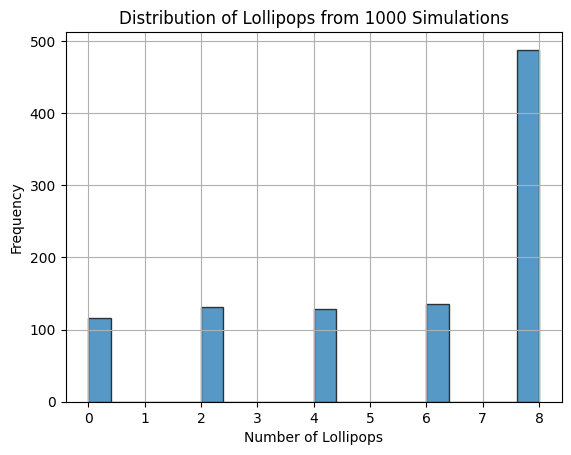

Expected number of lollipops: 5.494
Standard deviation: 2.9154697734670476


In [1]:
#EXAMPLE 1
import random as rnd
import matplotlib.pyplot as plt
import numpy as np

# Initialize lists to store picked balls and lollipops
ball_picked = []
lollipop_count = []

# Simulate 1000 picks
for i in range(1000):
    ball = rnd.randint(1, 8)
    ball_picked.append(ball)
    
    # Determine the number of lollipops based on the picked ball
    if ball == 1:
        lollipop = 0
    elif ball == 2:
        lollipop = 2
    elif ball == 3:
        lollipop = 4
    elif ball == 4:
        lollipop = 6
    elif ball in (5, 6, 7, 8):
        lollipop = 8

    # Append lollipops to the list
    lollipop_count.append(lollipop)

# Calculate the expected number of lollipops and standard deviation
expected_value = np.mean(lollipop_count)
std_dev = np.sqrt(np.var(lollipop_count))

# Plot the histogram for lollipop count
plt.hist(lollipop_count, bins=20, edgecolor='black', alpha=0.75)
plt.title('Distribution of Lollipops from 1000 Simulations')
plt.xlabel('Number of Lollipops')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Output the calculated values
print('Expected number of lollipops:', expected_value)
print('Standard deviation:', std_dev)


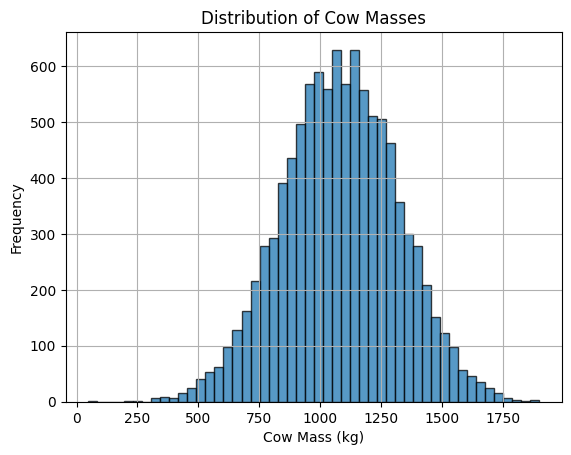

Number of cows with score 3 is: 15
Number of cows with score 6 is: 201
Number of cows with score 9 is: 1311
Number of cows with score 12 is: 3453
Number of cows with score 15 is: 3438
Number of cows with score 18 is: 1378
Number of cows with score 21 is: 204
Expected cow mass: 1081.519145247037
Standard deviation: 237.2898558777133


In [11]:
#EXAMPLE 2
import random as rnd
import matplotlib.pyplot as plt
import numpy as np

# Initialize the score count dictionary
score_counts = {
    3: 0,
    6: 0,
    9: 0,
    12: 0,
    15: 0,
    18: 0,
    21: 0
}

# Simulate the cow masses and assign scores
cow_numbers = []

for _ in range(10000):
    # Generate a random cow mass from a normal distribution (mean=1080, std_dev=240)
    cow_mass = rnd.normalvariate(1080, 240)
    cow_numbers.append(cow_mass)

    # Determine the score based on cow mass
    if cow_mass < 360:
        score_counts[3] += 1
    elif 360 <= cow_mass < 600:
        score_counts[6] += 1
    elif 600 <= cow_mass < 840:
        score_counts[9] += 1
    elif 840 <= cow_mass < 1080:
        score_counts[12] += 1
    elif 1080 <= cow_mass < 1320:
        score_counts[15] += 1
    elif 1320 <= cow_mass < 1560:
        score_counts[18] += 1
    else:
        score_counts[21] += 1

# Calculate the expected cow mass
expected_cow_mass = np.mean(cow_numbers)
std_dev = np.sqrt(np.var(cow_numbers))

# Plot the distribution of cow masses
plt.hist(cow_numbers, bins=50, edgecolor='black', alpha=0.75)
plt.title('Distribution of Cow Masses')
plt.xlabel('Cow Mass (kg)')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

# Output the number of cows in each score category
for score, count in score_counts.items():
    print(f'Number of cows with score {score} is: {count}')

# Output the expected cow mass
print('Expected cow mass:', expected_cow_mass)
print('Standard deviation:', std_dev)


# Task 3: Naive Bayes Classifier

Data obtained from https://github.com/johnmyleswhite/ML_for_Hackers

In [3]:
# import dependencies
import numpy as np
import pandas

# Read the data from the .csv, using the first row as the headers of the data
data = pandas.read_csv('01_heights_weights_genders.csv',header=0)

# Show just the first few samples so we know it's read correctly
data.head(n=3)

,Gender,Height,Weight
0,Male,73.847017,241.893563
1,Male,68.781904,162.310473
2,Male,74.110105,212.740856


### Visualise

      Gender     Height      Weight
0       Male  73.847017  241.893563
1       Male  68.781904  162.310473
2       Male  74.110105  212.740856
3       Male  71.730978  220.042470
4       Male  69.881796  206.349801
...      ...        ...         ...
9995  Female  66.172652  136.777454
9996  Female  67.067155  170.867906
9997  Female  63.867992  128.475319
9998  Female  69.034243  163.852461
9999  Female  61.944246  113.649103

[10000 rows x 3 columns]


<Axes: xlabel='Height', ylabel='Weight'>

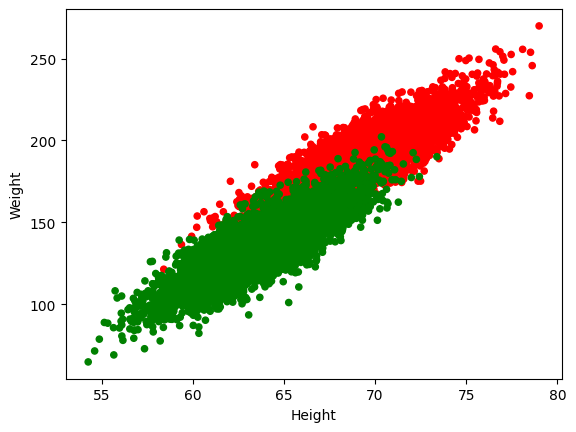

In [4]:
################################
# Your code here
print(data)
colors ={"Male" : "red", "Female" : "green"}
data.plot(kind='scatter',x="Height",y="Weight",c=data.Gender.map(colors))

### Discuss: Do you think there is resonable separation?
I would say this is a resnaoble seperation, because the general theory is males are taller and heavier than females. This seperation shows that the males(red) have higher average height and weight than the females(green).

### Features and labels
The aim is to predict the gender of the person based on characteristics such as height, weight. So we call what we want to predict the "label" and the characteristics the "features". This will be covered more later in the module, but is a good enough understanding for now.

In [5]:
X = data.iloc[:,1:3] # X is the features in our dataset
y = data.iloc[:,0]   # y is the Labels in our dataset

### Train/Test Split

We have a bunch of data from the csv file. What we need to do is decide what of that data we will use to train the algorithm, and what of that data will be used to see how good the result is. More on this later in the module, but you can't use the same data you train with to test the outcome, as it will naturally fit that very well, but you won't catch things like overfitting. 

There is some science to this, but for now we will randomly select one third for testing, and the rest for training.

In [6]:
################################
# Your code here
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, test_size=0.33)
print(X_train)   ## X is my features
print()
print(X_test)
print()
print(y_train)   ## Y are my predictors
print(y_test)

         Height      Weight
8931  63.437435  165.571160
5132  62.247081  117.230337
839   70.046953  190.002405
6878  64.986157  148.171777
7183  66.370214  149.478953
...         ...         ...
1796  73.841884  214.032504
8141  59.248656  110.587191
6990  63.491269  123.186629
5090  63.488460  124.052872
8894  65.933255  147.659739

[6700 rows x 2 columns]

         Height      Weight
166   66.262820  162.779583
1192  71.084804  178.535490
7348  67.111739  162.604791
8172  63.581407  138.229396
5944  65.480821  144.643032
...         ...         ...
1629  67.745493  179.554213
2218  67.511358  176.085424
1811  68.262850  169.225035
1438  72.742209  202.873683
5644  65.034537  145.706062

[3300 rows x 2 columns]

8931    Female
5132    Female
839       Male
6878    Female
7183    Female
         ...  
1796      Male
8141    Female
6990    Female
5090    Female
8894    Female
Name: Gender, Length: 6700, dtype: object
166       Male
1192      Male
7348    Female
8172    Female
5944    F

### Train the algorithm
We won't go into the details here, but we will use a Gaussian Naive Bayesian. Use GaussianNB from sklearn to train the model. The Gaussian is needed as we're dealing with sparse, continuous data

In [7]:
from sklearn.naive_bayes import GaussianNB

################################
sex_model = GaussianNB().fit(X_train, y_train)

### Test the algorithm
Using the test data

In [8]:
y_pred = sex_model.predict(X_test) #predicting our model to our test dataset
print("Predicted Value", y_pred)
print("Test Value", y_test.values)

Predicted Value ['Male' 'Male' 'Male' ... 'Male' 'Male' 'Female']
Test Value ['Male' 'Male' 'Female' ... 'Male' 'Male' 'Female']


In [9]:
from sklearn.metrics import accuracy_score

################################
accuracy_score = accuracy_score(y_test, y_pred) 
print (accuracy_score)

0.8809090909090909


### Plot the random samples

c:\Users\teand\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but GaussianNB was fitted with feature names
  warnings.warn(


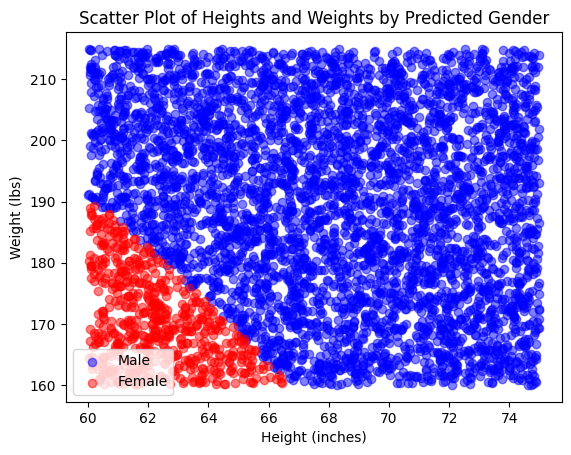

In [10]:
################################
# Your code here
import numpy as np
import matplotlib.pyplot as plt

#weight_range and height_range are defined
weight_range = (160, 215) 
height_range = (60, 75)

#Get random weights and heights in uniform distribution
weights = np.random.uniform(weight_range[0], weight_range[1], 5000)
heights = np.random.uniform(height_range[0], height_range[1], 5000)

#Using 2D array
x_samples = np.column_stack((heights, weights))

#Predict using the model
y_samples_pred = sex_model.predict(x_samples)

#Separate Male and Female predictions for plotting
male_indices = np.where(y_samples_pred == 'Male')
female_indices = np.where(y_samples_pred == 'Female')

#Plot Male samples in one color
plt.scatter(heights[male_indices], weights[male_indices], color='blue', label='Male', alpha=0.5)

#Plot Female samples in another color
plt.scatter(heights[female_indices], weights[female_indices], color='red', label='Female', alpha=0.5)

#Plot
plt.title('Scatter Plot of Heights and Weights by Predicted Gender')
plt.xlabel('Height (inches)')
plt.ylabel('Weight (lbs)')
plt.legend()
plt.show()


# Task 4 Reinforcement learning
Reinforcement learning (RL) enables an artificial intelligence (AI)-driven system—also called an agent—to learn by making mistakes and using feedback from its actions. With the obvious intention of enhancing the reward function, this feedback can be either positive or negative and indicated as a reward or a punishment. Reactive learning (RL) provides artificial intelligence that approximates natural intelligence to the best of existing capabilities, learning from its failures[1]. RL uses data from a dynamic environment, as opposed to the other two learning frameworks, which operate on a static dataset. Finding the best course of action to produce the best result is the objective, not clustering or labelling data. Allowing an agent, a piece of software, to explore, interact with, and learn from the environment is how reinforcement learning resolves this issue.

### Application
Two robotic arms could be trained to compete against one another in a game of table tennis using reinforcement learning. In this scenario, the robot arms represent the agents learning to play the game, and the table, net, and ball represent the environment. Every agent's objective is to prolong the length of time the ball is in play with the ultimate goal of defeating the opposition by hitting the ball past them. Every robot arm has the ability to move in many ways, including swinging the paddle, changing the paddle's angle, and lining itself up to strike the ball. Actions could include swerving left or right, changing the pace of the paddle, striking with different amounts of force, or spinning the ball. Both the robot arms have control over swinging the paddle, adjusting the angle of the paddle, and positioning itself inorder to hit the ball. 

The reward system could be structured as follows:

- A positive reward for successfully returning the ball to the opponent's side of the table.
- A larger positive reward for winning the point by hitting the ball past the opponent or causing the opponent to miss.
- A penalty for failing to return the ball, such as hitting it out of bounds or into the net.
To encourage long rallies, additional rewards could be given for keeping the ball in play over multiple exchanges.

With the progress of the game, both robotic arms start to acquire more information regarding their performed actions and the results generated from such activities, now attempting to mold their tactics to the particular reward received. 
### Supervised, Un-Supervised
Why can’t one or both approaches be used in specific or relative instances? For example, in a supervised learning setup, a model is trained with a labelled dataset and that is the input-output information which consists of the factors and the response[2]. It is the target of supervised learning to create such a representation that relates the input data with the relevant output data. For the case of the table, it is close to impossible to obtain a dataset large enough to adjust each angle of the the round table at the same time. It would be difficult to get such a rich and diverse tag data as the labelled datasets, because balancing the ball in many manners in different scenarios will require some human intervention and expertise on what to do next. A tilting table and balancing ball physical system is very dynamic and continuous. Typically supervised learning models are more applicable to static data or discrete shapes of the data. There is also no way you can do that with the fixed number of labelled samples given: label some moving and evolving picture of the surrounding environment.

Unsupervised learning is the training of a computer utilising unlabeled information and allowing the algorithm to operate on that information without supervision[2]. As a result, the machine is limited to discovering the hidden structure in unlabeled data on its own.Unsupervised learning lacks this technique for modifying the system's behaviour. It's difficult to educate the system to balance the ball without a clear reward signal.Hence, using unsupervised learning, it is not possible to assign that much information for the algorithm to act on as well.

- [1]https://online.york.ac.uk/what-is-reinforcement-learning/
- [2]https://www.geeksforgeeks.org/supervised-unsupervised-learning/